In [21]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import numpy as np

IMAGE_SIZE = (200,200)

x = []
y = []

folder = './face_age'
set = os.listdir(folder)
num_classes = 0

for i in set:
    num_classes += 1
    for file in os.listdir(f"{folder}/{i}"):
        if file[-4:]=='.png':
            image=keras.preprocessing.image.load_img(f"{folder}/{i}/{file}", grayscale=False, color_mode='rgb', target_size=(150,150))
            x_arr = keras.preprocessing.image.img_to_array(image)
            y.append(int(i[-3:]))
            x.append(x_arr)
print(f"Det er {num_classes} klasser")
print(len(x))
print(len(y))

Det er 99 klasser
9778
9778


In [22]:
x = np.asarray(x)
y = np.asarray(y)
x = x.astype('float32')
x /= 255.0
print('Min: %.3f, Max: %.3f' % (x.min(), x.max()))

Min: 0.000, Max: 1.000


In [15]:
print(x.shape)
print(y.shape)

(9778, 150, 150, 3)
(9778,)


86


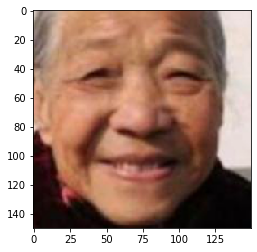

In [16]:
import matplotlib.pyplot as plt
#Se et tilfeldig bilde sammen med alder slik at innlesing stemmer
test = tf.keras.preprocessing.image.array_to_img(x[6300])
plt.imshow(test)
print(y[6300])

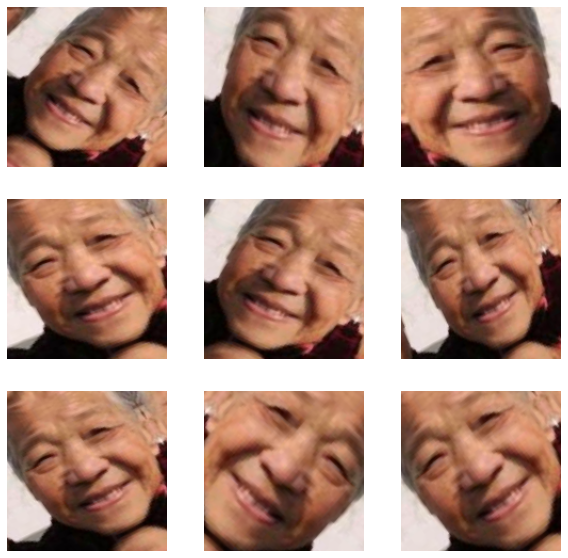

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode='reflect',
    horizontal_flip = True)

test = x[6300]
test = test.reshape((1,) + test.shape)
i = 0
plt.figure(figsize=(10, 10))
for batch in datagen.flow(test, batch_size=1):
    if i >= 9:
        break
    image = batch[0,:,:,:]
    sheesh = tf.keras.preprocessing.image.array_to_img(image)
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(sheesh)
    plt.axis("off")
    i += 1
    

In [23]:
from tensorflow.keras import layers
def build_model():
    model = keras.Sequential()
    model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes,activation="linear")) 
    return model

model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 99)                17348067  
Total params: 17,348,963
Trainable params: 17,348,963
Non-trainable params: 0
_________________________________________________________________


In [24]:
epochs = 50
batch_size = 128

In [ ]:
model = build_model()

model.compile(optimizer="adam",loss="mean_absolute_error",metrics=['mean_absolute_error'])

model_history = model.fit(
            x,
            y,
            batch_size= batch_size,
            epochs = epochs,
            verbose=True)

2021-11-08 12:11:39.227781: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-08 12:11:39.242937: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
76/77 [============================>.] - ETA: 0s - loss: 0.0000e+00 - mean_absolute_error: 0.0000e+00